In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('sales_train.csv')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
train['shop_id'].unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [14]:
complete_data = []
incomplete_data = []
for i in train['shop_id'].unique():
    if len(train[train['shop_id']==i]['date_block_num'].unique()) == 34:
        complete_data.append(i)
    else:
        incomplete_data.append(i)


In [16]:
len(complete_data)

32

In [18]:
tot = []
for i in incomplete_data:
    tot.append(len(train[train['shop_id']==i]['date_block_num'].unique()))

In [19]:
tot

[4,
 32,
 29,
 2,
 2,
 4,
 33,
 20,
 26,
 7,
 28,
 25,
 33,
 33,
 32,
 32,
 30,
 20,
 4,
 23,
 20,
 11,
 19,
 16,
 9,
 2,
 1,
 1]

In [20]:
for i in range(len(tot)):
    if tot[i]>=24:
        complete_data.append(incomplete_data[i])

In [22]:
len(complete_data)

43

In [23]:
train['item_id'].unique()

array([22154,  2552,  2554, ...,  7610,  7635,  7640])

In [24]:
complete_data_item = []
incomplete_data_item = []
for i in train['item_id'].unique():
    if len(train[train['item_id']==i]['date_block_num'].unique())>= 24:
        complete_data_item.append(i)
    else:
        incomplete_data_item.append(i)

In [26]:
item = pd.read_csv('items.csv')
item

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [35]:
train['item_category_id'] = train['item_id']
for i in item['item_id'].unique():
    train.loc[train['item_category_id']==i, 'item_category_id'] = item.loc[item['item_id']==i,'item_category_id'].values[0]

In [28]:
item['item_id'].unique()

array([    0,     1,     2, ..., 22167, 22168, 22169])

In [30]:
train.loc[train['item_category_id']==22154, 'item_category_id']

0          22154
3270       22154
17081      22154
25918      22154
25919      22154
25920      22154
25921      22154
25922      22154
35509      22154
45824      22154
55818      22154
68540      22154
74733      22154
94240      22154
102088     22154
107346     22154
111602     22154
113647     22154
120509     22154
130308     22154
142522     22154
167387     22154
178508     22154
178509     22154
317730     22154
337792     22154
355735     22154
401334     22154
403711     22154
738802     22154
773386     22154
930653     22154
951143     22154
958084     22154
992350     22154
1234932    22154
2721275    22154
2736888    22154
2736905    22154
2745357    22154
2767578    22154
2769248    22154
2771481    22154
2772500    22154
2778433    22154
2785019    22154
2798569    22154
2798570    22154
2827637    22154
2829948    22154
2836284    22154
2845288    22154
2846522    22154
2881562    22154
2888912    22154
2903579    22154
2909025    22154
2928368    22154
2930033    221

In [58]:
train['sold'] = train['item_price']*train['item_cnt_day']
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,sold
0,02.01.2013,0,59,22154,999.00,1.0,37,999.00
1,03.01.2013,0,25,2552,899.00,1.0,58,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,58,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,58,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,56,1099.00
...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,55,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,55,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,55,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,57,299.00


In [34]:
item.loc[item['item_id']==i,'item_category_id'].values[0]

69

In [37]:
complete_data_item = []
incomplete_data_item = []
for i in train['item_category_id'].unique():
    if len(train[train['item_category_id']==i]['date_block_num'].unique())>= 24:
        complete_data_item.append(i)
    else:
        incomplete_data_item.append(i)

In [45]:
(complete_data_item)

[37,
 58,
 56,
 55,
 23,
 19,
 28,
 30,
 21,
 40,
 75,
 49,
 29,
 22,
 67,
 73,
 77,
 57,
 60,
 4,
 62,
 43,
 15,
 2,
 3,
 5,
 35,
 33,
 6,
 38,
 25,
 14,
 45,
 41,
 11,
 69,
 65,
 64,
 79,
 63,
 70,
 83,
 72,
 61,
 71,
 9,
 31,
 76,
 78,
 54,
 44,
 12,
 20]

In [43]:
train[train['item_category_id']==59]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
5,10.01.2013,0,25,2564,349.0,1.0,59
25,27.01.2013,0,25,2609,1699.0,1.0,59
27,26.01.2013,0,25,2611,299.0,1.0,59
112,10.01.2013,0,25,2640,349.0,1.0,59
132,08.01.2013,0,25,2149,449.0,1.0,59
...,...,...,...,...,...,...,...
2032387,11.10.2014,21,30,12991,28.0,1.0,59
2061787,02.10.2014,21,15,6348,398.0,1.0,59
2221083,26.12.2014,23,51,6009,663.0,1.0,59
2285858,20.12.2014,23,6,10030,28.0,1.0,59


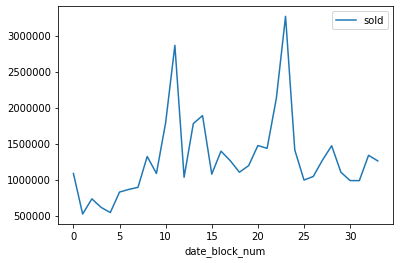

In [67]:
train[train['shop_id']==2][['date_block_num','sold']].groupby(by = 'date_block_num').sum().plot()

In [73]:
pred1 = train[(train['item_category_id']==37)&(train['shop_id']==2)][['date_block_num','sold']].groupby(by = 'date_block_num').sum()
j=1
pred1['month'] = 0
for i in pred1.index:
    if j>12:
        j=1
    pred1['month'].iloc[i] = j
    j=j+1




/Users/parthpatel/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,sold,month
date_block_num,,
9,16071.0,10
21,12382.0,10
33,18949.0,10


In [81]:
pred1[pred1['month']==11]

,sold,month
date_block_num,,
10,20815.0,11
22,8535.0,11


In [80]:
pred1

,sold,month
date_block_num,,
0,27635.07,1
1,9328.00,2
2,5461.00,3
3,10484.00,4
4,7906.00,5
5,12908.90,6
6,6832.00,7
7,11231.00,8
8,11766.00,9
